# Hồi quy tuyến tính đơn biến

Chúng ta có 1 bảng dữ liệu về chiều cao và cân nặng của 15 người như trong bảng dưới đây:

| Chiều cao (cm)        | 147 | 150 | 153 | 155 | 158 | 160 | 163 | 165 | 168 | 170 | 173 | 175 | 178 | 180 | 183 |
| :-------------------: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| **Cân nặng (kg)**     | **49** | **50** | **51** | **52** | **54** | **56** | **58** | **59** | **60** | **62** | **63** | **64** | **66** | **67** | **68** |


Bài toán đặt ra là: liệu có thể dự đoán cân nặng của một người dựa vào chiều cao của họ không? (_Trên thực tế, tất nhiên là không, vì cân nặng còn phụ thuộc vào nhiều yếu tố khác nữa, thể tích chẳng hạn_). 

Trong ví dụ này, giả sử cân nặng sẽ tỉ lệ thuận với chiều cao (càng cao càng nặng), nên có thể sử dụng Linear Regression model cho việc dự đoán này.

Trước tiên, chúng ta cần có hai thư viện [numpy](http://www.numpy.org/) cho đại số tuyến tính và [matplotlib](http://matplotlib.org/) cho việc vẽ hình. 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## KIỂM TRA TÍNH TƯƠNG QUAN

Để kiểm tra xem chiều cao và cân năng có mối tương quan tuyến tính với nhau hay không, ta có thể kiểm tra bằng 2 cách: vẽ đồ thị phân tán hoặc tính hệ số tương quan Pearson

__Lưu ý__
- Sử dụng đồ thị: chỉ dùng trong trường hợp 1 biến hoặc 2 biến. Nếu nhiều hơn thì ta không biểu diễn được
- Sử dụng hệ số tương quan Pearson: chỉ dùng trong trường hợp mối tương quan là tuyến tính. Trong trường hợp 2 biến x, y có mối tương quan nhưng không tuyến tính, việc sử dụng hệ số n ày không đem lại kết quả chính xác.

### Bằng Đồ Thị

Tiếp theo, chúng ta khai báo và biểu diễn dữ liệu trên một đồ thị.

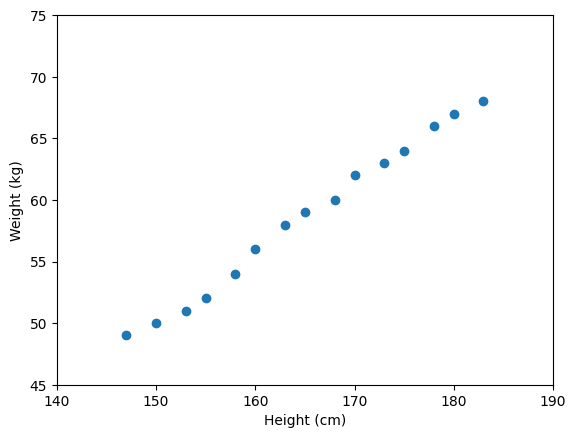

In [2]:
# height (cm)
x = np.array([147, 150, 153, 155, 158, 160, 163, 165, 168, 170, 173, 175, 178, 180, 183])
# weight (kg)
y = np.array([ 49, 50, 51, 52, 54, 56, 58, 59, 60, 62, 63, 64, 66, 67, 68])
# Visualize data 
plt.plot(x, y, 'o')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

### Bằng Hệ Số Tương Quan Pearson

Hệ số tương quan Pearson - $r_{xy}$ (correlation coefficient) đo mối quan hệ tuyến tính giữa hai biến:

$$r_{xy} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum{(x_i - \bar{x})^2} \sum{(y_i - \bar{y})^2}}} = \frac{Cov(x, y)}{s_x * s_y}$$

- Miền giá trị: -1 <= $r_{xy}$ <= 1
- $r_{xy} = 0$: hai biến x, y không có mối quan hệ tuyến tính
- $r_{xy} = 1$: hai biến x, y có mối quan hệ tuyến tính tuyệt đối
- $|r_{xy}|$ càng gần 1 thì mối quan hệ tuyến tính giũa hai biến càng mạnh
- Nếu $r_{xy}$ < 0: hai biến x, y có mối quan hệ nghịch biến
- Nếu $r_{xy}$ > 0: hai biến x, y có mối quan hệ đồng biến

In [3]:
np.corrcoef(x, y)

array([[1.        , 0.99673625],
       [0.99673625, 1.        ]])

Ta thấy hệ số tương quan là: __0.9967__ cho thấy 2 biến x, y có tương quan tuyến tính mạnh. Vì vậy, có thể xây dựng mô hình hồi quy tuyến tính cho 2 biến x, y

## XÂY DỰNG MÔ HÌNH

Mô hình hồi quy tuyến tính đơn biến có công thức như sau:
$$\hat{y} = \beta_0 + \beta_1x$$

Trong đó:
- $\hat{y}$: là giá trị dự đoán của biến $y$
- $x$: giá trị của biến tiên lượng
- $\beta_0$: là giao điểm (*intercept*) của đường thẳng hồi quy và trục tung
- $\beta_1$: là độ dốc của đường thẳng hồi quy, thể hiện mức độ thay đổi của biến $y$ khi biến $x$ thay đổi một đơn vị

Bằng phương pháp bình phương tối tiểu tổng sai số giữa giá trị thực tế và giá trị dự đoán: $\sum(y_i - \hat{y_i})^2$, ta có được công thức tính độ dốc và giao điểm của đường thẳng hồi quy như sau:

$$\beta_1 = \frac{s_{xy}}{s_{xx}} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

*Lưu ý*: phương trình đường thẳng hồi quy  đi qua điểm $(\bar{x}, \bar{y})$

### Cách 1: Tính Theo Công Thức

In [4]:
tu = sum((x - x.mean()) * (y - y.mean()))
tu

np.float64(1007.1999999999998)

In [5]:
mau = sum((x - x.mean()) * (x - x.mean()))
mau

np.float64(1786.3999999999999)

In [6]:
b1 = tu/mau
b1

np.float64(0.5638154948499775)

In [7]:
b0 = y.mean() - b1 * x.mean()
b0

np.float64(-34.54231974921628)

In [8]:
print(f"Mô hình hồi quy: y = {b0.round(4)} + {b1.round(4)}x")

Mô hình hồi quy: y = -34.5423 + 0.5638x


#### Vẽ đồ thị

In [9]:
x0 = x.min()
y0 = b0 + b1*x0

x1 = x.max()
y1 = b0 + b1*x1

print(x0, y0)
print(x1, y1)

147 48.33855799373041
183 68.6359158083296


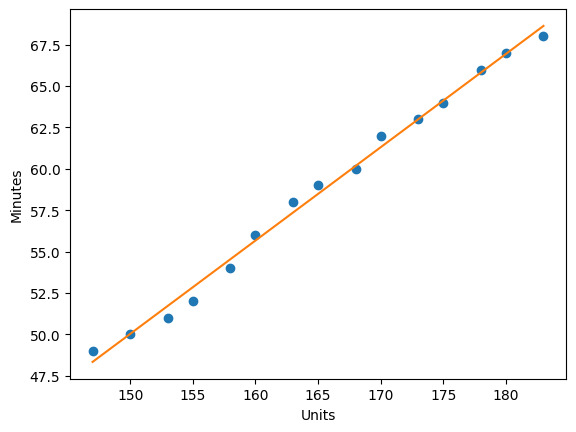

In [10]:
# Vẽ mô hình
plt.plot(x, y, 'o')
plt.plot([x0, x1], [y0, y1])

plt.xlabel('Units')
plt.ylabel('Minutes')
plt.show()

### Cách 2: Sử Dụng Thư Viện

Sử dụng thư viện `statsmodels` như sau:

In [11]:
import statsmodels.api as sm
import pandas as pd

In [12]:
# ordinary least square (OLS)
model = sm.formula.ols('y~x', data=pd.DataFrame({'x': x, 'y':y})).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1982.
Date:                Sat, 05 Apr 2025   Prob (F-statistic):           1.35e-15
Time:                        15:42:15   Log-Likelihood:                -10.837
No. Observations:                  15   AIC:                             25.67
Df Residuals:                      13   BIC:                             27.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.5423      2.097    -16.474      0.0

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [13]:
model.params

Intercept   -34.542320
x             0.563815
dtype: float64

In [14]:
print(f"Mô hình hồi quy: y = {model.params[0].round(4)} + {model.params[1].round(4)}x")

Mô hình hồi quy: y = -34.5423 + 0.5638x


C:\Users\Admin\AppData\Local\Temp\ipykernel_6520\4286752693.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Mô hình hồi quy: y = {model.params[0].round(4)} + {model.params[1].round(4)}x")


__Nhận xét__ kết quả giống như ở C1

# ĐÁNH GIÁ

Để đánh giá mô hình ta sử dụng hệ số xác định mô hình $R^2$ (R squared). Giá trị này thể hiện tỷ lệ phần trăm giá trị thực của biến dự đoán có thể giải thích được bằng mô hình. Giá trị của $R^2$ càng lớn thì mô hình càng tốt. 

Để tính giá trị này, bạn có thể tính toán theo công thức:

$$R^2 = \frac{RSS}{TSS}$$

Quan sát trên cách xây dựng mô hình bằng thư viện ở trên, bạn cũng có thể thấy giá trị R-squared là 0.993 hay 99.3%; hoặc có thể sử dụng câu lệnh dưới đây:

In [15]:
print('Hệ số xác định mô hình: ', model.rsquared)

Hệ số xác định mô hình:  0.993483146278687


__Nhận xét__ mô hình đã xây dựng trong ví dụ này khá tốt (giá trị gần 100%)

# DỰ BÁO

Nếu mô hình hồi quy xây dựng được là tốt, thì ta có thể sử dụng mô hình đó để dự đoán giá trị của cân nặng(y) dựa vào chiều cao(x).

Giả sử một người có chiều cao là 178(cm) thì áp dụng mô hình ta có thể dự đoán được cân nặng của người đó là:

In [16]:
# C1: Sử dụng mô hình đã xây dựng: y = -34.5423 + 0.5638x
print('Cân nặng: ', -34.5423 + 0.5638*178)

Cân nặng:  65.8141


In [17]:
# Sử dụng thư viện
model.predict(exog=dict(x=178))

0    65.816838
dtype: float64

In [18]:
# Dự đoán cân nặng của 3 người có chiều cao là 178cm, 180cm, 181cm
model.predict(exog=dict(x = [178, 180, 181]))

0    65.816838
1    66.944469
2    67.508285
dtype: float64

# NHẬN XÉT

Mô hình hồi quy tuyến tính là mô hình đơn giản, dễ xây dựng. Tuy nhiên, nhược điểm của mô hình này là rất dễ nhạy cảm với nhiễu. Vì vậy, trong trường hợp dữ liệu có nhiều điểm dữ liệu nhiễu cần cân nhắc khi áp dụng.

---